## 🏡 **CFG +Masters Project: Serviced Accommodation in Essex - Analysis and Prediction**

This project dives into the world of **Serviced accommodation listings in Essex** with the goal of assisting a holiday lettings company select profitable properties to invest in based on historical Airbnb listing data. 


### 🧠 Project Objective

A holiday lettings company is on the lookout for promising properties across Essex to purchase. They are seeking data insights to select properties that can earn the highest income. 

The aims of this project are:
- identify the features that mostly correlates with occupancy rates and annual revenue
- build a machine learning model that predicts which types of properties achieves the highest occupancy rates and revenue potential. 

### 📈 The Data

The data is retrieved from real data acquired from PriceLabs (https://www.pricelabs.co), a subscription-based database often used by property investors that provides professionally managed datasets for existing and potential Airbnb businesses.

### 🛠️ Phase 1 : Data Wrangling and Exploratory Data Analysis

This first phase analysis will focus on the following:
- **Data cleaning**: To manage missing data, fixing outliers, handling duplicates etc.
- **Pre-processing and transformation**: Merging datasets, Encoding and transforming columns as needed.
- **Exploratory Data Analysis (EDA)**


### 🔍 What I'm Exploring

- **Airbnb Host features**: Reviews, professionally managed
- **Property Details**: Property type, number of bathrooms, number of occupants 
- **Amenities**: seafront, hot-tub, pets allowed, smoking allowed
- **Listing features**: Minimum length of stays, active days, blocked days
- **Target Variables**: Revenue, occupancy rate


| **Category** | **Feature**         | **Description**                                         | **Data Type**          |
|--------------|---------------------|---------------------------------------------------------|------------------------|
| Property     | Number of Bedrooms  | Total number of bedrooms in the property                | Discrete Numerical     |
|              | Number of Bathrooms | Total number of bathrooms in the property               | Discrete Numerical     |
|              | Number of Guests    | Maximum number of guests allowed                        | Discrete Numerical     |
|              | Location            | Town in Essex where the property is located             | Categorical            |
| Host         | Host Ratings        | Average rating of the host                              | Continuous Numerical   |
|              | Number of Reviews   | Total number of reviews received                        | Discrete Numerical     |
| Amenities    | Seafront            | Whether the property is near the sea                    | Binary Categorical     |
|              | Hot Tub             | Availability of a hot tub                               | Binary Categorical     |
|              | Pets Allowed        | Whether pets are permitted                              | Binary Categorical     |
|              | Smoking Allowed     | Whether smoking is permitted                            | Binary Categorical     |
| Listing      | Length of Stay      | Minimum or maximum nights per stay                      | Discrete Numerical     |
|              | Active Days         | Days the listing is live and bookable                   | Discrete Numerical     |
|              | Blocked Days        | Days the listing is unavailable                         | Discrete Numerical     |
|              | Price               | Nightly price of the listing                            | Continuous Numerical   |

| **Variable**       | **Description**                                                       | **Data Type**          |
|--------------------|-----------------------------------------------------------------------|------------------------|
| Annual Revenue      | Total income generated per listing annually                          | Continuous Numerical   |
| Occupancy Rate      | % of booked days out of total active days (Booked ÷ Active × 100)    | Continuous Numerical   |


## Import Python Modules and Data Files

In [386]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

In [387]:
# import data files 
airbnb_2bed = pd.read_csv("data/airbnb_essex_2bed.csv")   # please check and use your local file path
airbnb_2bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1305239269239446863,Grays,0,NaN,0,42,NaN,NaN,NaN,3,...,11,NaN,0,No,No,No,Yes,No,No,No
1,1323330681470281939,Grays,0,NaN,0,25,NaN,NaN,NaN,1,...,25,5.0,1,No,No,No,Yes,No,No,No
2,960377081653062660,Grays,0,NaN,0,314,NaN,NaN,NaN,3,...,52,4.0,1,No,No,No,Yes,No,No,No
3,1270246391535349924,Grays,0,NaN,0,83,NaN,NaN,NaN,1,...,0,NaN,0,No,No,No,Yes,No,No,No
4,660855460760807240,Grays,0,NaN,0,363,NaN,NaN,Low,4,...,3,3.0,1,No,No,No,Yes,No,No,No


In [388]:
airbnb_3bed= pd.read_csv("data/airbnb_essex_3bed.csv")  # please check and use your local file path
airbnb_3bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1205963819672225857,Southend-on-Sea,0,NaN,0,151,NaN,NaN,NaN,5,...,1,0.00,0,No,No,No,Yes,No,No,No
1,870111683833490126,Southend-on-Sea,0,NaN,0,138,NaN,NaN,NaN,14,...,56,0.00,0,No,No,No,Yes,No,No,No
2,46934205,Southend-on-Sea,0,NaN,0,101,NaN,NaN,NaN,1,...,171,4.71,7,No,No,No,Yes,No,No,No
3,987440215251843897,Southend-on-Sea,0,NaN,0,187,NaN,NaN,NaN,3,...,179,4.55,0,No,No,No,Yes,No,No,No
4,1011456380483308029,Southend-on-Sea,0,NaN,0,78,NaN,NaN,High,1,...,63,NaN,0,No,No,No,Yes,No,No,No


In [389]:
#checking data of both data files

airbnb_2bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 879 non-null    int64  
 1   town                       879 non-null    object 
 2   est_rental_revenue_median  879 non-null    int64  
 3   estimated_ADR              817 non-null    float64
 4   Est_adj_occupancy          879 non-null    int64  
 5   active_days                879 non-null    int64  
 6   booking_window             817 non-null    float64
 7   length_of_stay             817 non-null    float64
 8   dynamic_pricing            470 non-null    object 
 9   min_stay                   879 non-null    int64  
 10  management                 879 non-null    object 
 11  Bedrooms                   879 non-null    int64  
 12  bathrooms                  879 non-null    float64
 13  max_guests                 879 non-null    int64  

In [390]:
airbnb_3bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 452 non-null    int64  
 1   town                       452 non-null    object 
 2   est_rental_revenue_median  452 non-null    int64  
 3   estimated_ADR              400 non-null    float64
 4   Est_adj_occupancy          452 non-null    int64  
 5   active_days                452 non-null    int64  
 6   booking_window             400 non-null    float64
 7   length_of_stay             400 non-null    float64
 8   dynamic_pricing            240 non-null    object 
 9   min_stay                   452 non-null    int64  
 10  management                 452 non-null    object 
 11  Bedrooms                   452 non-null    int64  
 12  bathrooms                  452 non-null    float64
 13  max_guests                 452 non-null    int64  

Both datasets have a 26 columns of features (i.e not including the listing IDs) which are identical.  12 of these are contain string values, the rest are numeric columns. 

In [391]:
#Combining both datasets to create one datafram: as there are the same columns, the datasets can be concatetenated. 

data = pd.concat([airbnb_2bed, airbnb_3bed], ignore_index=True)
data.shape


(1331, 27)

The dataset now as 1331 rows and 27 columns of data. 

## Standardisation and Cleaning

### **Column standardisation**

In [392]:
#Checking columns of the dataset
data.columns

Index(['listing_ID', 'town', 'est_rental_revenue_median', 'estimated_ADR',
       'Est_adj_occupancy', 'active_days', 'booking_window', 'length_of_stay',
       'dynamic_pricing', 'min_stay', 'management', 'Bedrooms', 'bathrooms',
       'max_guests', 'listed_price', 'is_active', 'economic_Category',
       'blocked_days', 'rating', 'Num_Reviews', 'beachfront', 'hot_tub',
       'EV_charger', 'kitchen', 'pool', 'pets_allowed', 'smoking_allowed'],
      dtype='object')

In [393]:
#standardising column names to lowercase
data.columns = data.columns.str.lower()

print(f"Columns in dataset :{data.columns.values}")


Columns in dataset :['listing_id' 'town' 'est_rental_revenue_median' 'estimated_adr'
 'est_adj_occupancy' 'active_days' 'booking_window' 'length_of_stay'
 'dynamic_pricing' 'min_stay' 'management' 'bedrooms' 'bathrooms'
 'max_guests' 'listed_price' 'is_active' 'economic_category'
 'blocked_days' 'rating' 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger'
 'kitchen' 'pool' 'pets_allowed' 'smoking_allowed']


In [394]:
#renaming of columns for readability

data.rename(columns = {'est_rental_revenue_median': 'year_revenue', 'estimated_adr':'avg_daily_rate', 'est_adj_occupancy':'occupancy'}, inplace=True)

In [395]:
#checking change in column names
print(f"Columns in dataset :{data.columns.values}")

Columns in dataset :['listing_id' 'town' 'year_revenue' 'avg_daily_rate' 'occupancy'
 'active_days' 'booking_window' 'length_of_stay' 'dynamic_pricing'
 'min_stay' 'management' 'bedrooms' 'bathrooms' 'max_guests'
 'listed_price' 'is_active' 'economic_category' 'blocked_days' 'rating'
 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger' 'kitchen' 'pool'
 'pets_allowed' 'smoking_allowed']


### **Data Cleaning**



#### Removing duplicate listings


Duplicates (based on listing_id) in the dataset can occur as one property can feature within 2 neighbourhoods. 

In [396]:
# looking at the duplicates
data[data.duplicated(subset=['listing_id'], keep=False)]

,listing_id,town,year_revenue,avg_daily_rate,occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,991120607387030667,Grays,92,92.39,0,366,48.0,1.0,NaN,1,...,0,0.00,0,No,No,No,Yes,No,No,No
24,1339734188104641921,Grays,689,86.08,15,54,7.0,6.0,NaN,2,...,58,NaN,0,No,No,No,Yes,No,No,No
32,1029075368162869978,Grays,1398,93.19,19,79,14.0,4.0,NaN,3,...,281,NaN,0,No,No,No,Yes,No,No,No
34,1313627075795796786,Grays,1805,75.21,44,55,37.0,7.0,NaN,4,...,93,NaN,0,No,No,No,Yes,No,No,No
38,1339093830414323513,Grays,2025,84.36,42,57,5.0,5.0,Low,1,...,39,NaN,0,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,867428043609660988,Brentwood,0,NaN,0,180,NaN,NaN,NaN,7,...,186,0.00,0,No,No,No,Yes,No,Yes,No
1179,809501303830183077,Brentwood,7775,97.19,71,112,26.0,43.0,NaN,2,...,194,5.00,4,No,No,No,Yes,No,No,No
1180,725823036821709871,Brentwood,7859,145.54,15,363,42.0,5.0,NaN,2,...,3,3.83,6,No,No,No,Yes,No,No,No
1190,872913740243580186,Brentwood,51017,147.45,98,352,75.0,18.0,NaN,1,...,14,5.00,23,No,No,Yes,Yes,No,No,No


In [397]:
#dropping any duplicates, keeping the first occurence
data = data.drop_duplicates(subset='listing_id', keep='first')

In [398]:
#checking the remaining data after dropping duplicates
data.shape

(1236, 27)

There are now a total of 1236 rows of data

#### Remove irrelevant columns

One of the primary use of PriceLabs data is for agents and airbnb owners to determine listing prices. The columns "booking window" and "dynamic pricing" are used to determine this as is not relevant to our analysis. These columns as will dropped. 

In [399]:
data.drop(columns=['listing_id','booking_window','dynamic_pricing'],inplace=True )

#### Missing values

<Axes: >

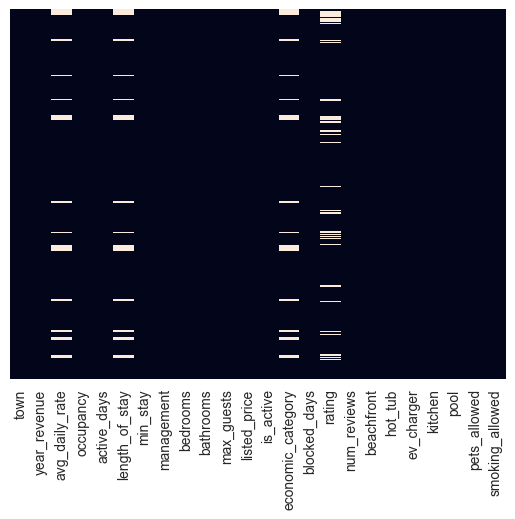

In [400]:
#analyising patterns and distributions of missing values in the data using a heatmap
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [402]:
print("Columns with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Columns with missing values are:
avg_daily_rate       110
length_of_stay       110
economic_category    110
rating               144
dtype: int64


In [403]:
#checking column dropped successfully
data.shape

(1236, 24)

It also appears that there are exactly the same number of missing values (110) for 3 columns - avg_daily_rate, length_of_stay and economic_category, which suggest that this might be along the same rows (listings).

In [404]:
# analysing these rows further

mask = data[['avg_daily_rate', 'length_of_stay', 'economic_category']].isnull().all(axis=1)

In [405]:
data[mask][['occupancy', 'year_revenue']].describe()

,occupancy,year_revenue
count,110.0,110.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


This table confirms that these 110 rows also do not contain data for rental revenue and occupancy which suggests either the properties did not have rental data available or were not rented out during the preceeed 365 days. These rows will therefore be dropped from the study. 

In [406]:
#exploring zero values for target variable 
data[(data['year_revenue'] == 0)]

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
0,Grays,0,NaN,0,42,NaN,3,Small,2,2.0,...,11,NaN,0,No,No,No,Yes,No,No,No
1,Grays,0,NaN,0,25,NaN,1,Small,2,2.0,...,25,5.0,1,No,No,No,Yes,No,No,No
2,Grays,0,NaN,0,314,NaN,3,Individual,2,2.5,...,52,4.0,1,No,No,No,Yes,No,No,No
3,Grays,0,NaN,0,83,NaN,1,Individual,2,1.0,...,0,NaN,0,No,No,No,Yes,No,No,No
4,Grays,0,NaN,0,363,NaN,4,Small,2,1.5,...,3,3.0,1,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Grays,0,NaN,0,94,NaN,1,Small,3,3.0,...,76,0.0,0,No,No,No,Yes,No,No,No
1256,Grays,0,NaN,0,52,NaN,1,Large,3,1.0,...,35,3.5,0,No,No,No,Yes,No,No,No
1257,Grays,0,NaN,0,183,NaN,3,Large,3,1.5,...,183,NaN,0,No,No,No,Yes,No,Yes,No
1258,Grays,0,NaN,0,127,NaN,3,Large,3,2.0,...,187,4.5,0,No,No,No,Yes,No,No,No


In [407]:
# selecting rows where revenue is not equals to 0. 
data = data[data['year_revenue'] != 0]
data.head(5)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,...,0,0.00,0,No,No,No,Yes,No,No,No
21,Grays,567,113.31,4,136,5.0,4,Moderate,2,1.0,...,3,NaN,0,No,No,No,Yes,No,Yes,No
22,Grays,597,119.41,10,49,5.0,1,Large,2,2.0,...,96,4.42,0,No,No,No,Yes,No,No,No
23,Grays,627,156.73,13,30,4.0,2,Moderate,2,2.0,...,43,5.00,4,No,No,No,Yes,No,No,No
24,Grays,689,86.08,15,54,6.0,2,Large,2,1.0,...,58,NaN,0,No,No,No,Yes,No,No,No


### Outliers

In [408]:
#checking numeric values for possible outliers
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1029.000000,1126.000000
mean,14183.282416,111.085444,58.397869,219.482238,11.089698,3.057726,2.351687,1.431616,5.022202,136.517762,67.636767,4.583703,26.719361
std,11384.073480,50.895556,26.713322,98.945584,8.887841,5.232144,0.477709,0.562324,1.349385,65.237925,64.608389,0.876289,48.672669
min,66.000000,24.570000,0.000000,17.000000,1.000000,1.000000,2.000000,0.000000,2.000000,28.000000,0.000000,0.000000,0.000000
25%,5385.250000,82.625000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.250000,16.000000,4.610000,2.000000
50%,11957.000000,101.125000,63.000000,229.500000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19980.750000,125.387500,79.000000,310.000000,15.750000,3.000000,3.000000,2.000000,6.000000,154.750000,102.000000,5.000000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


Outliers in this study could be caused by the following:

Our target variables for this study are annual revenue (**year_revenue**) and occupancy rate (**occupancy**), the rest are independent variables ('features') for this study. There is a signicant difference between the max value and the 75th percentiles for both these values which suggest possible outliers or data anomalies which will need further analysis 

Within the features, there are also larger at expected intervals between 75th percentile and max values for the following: **booking_window**, **length_of_stay**, **min_stay**, **listed_price**, **blocked_days**, **num_reviews**. These will also be looked at more closely to determine if these are possible data errors or listing errors.

**Average daily rate**: Calculation of this variable is (occupany rate x listed_price) / days booked. This variable is usually used by industry professionals as a guidance for setting listed pricing and is dynamic. For this study, this is not used to as either a feature or target. 

For minimum values, a minimum occupancy of 0 and min revenue of £66 are contradictory. Zero minimum values for **bathrooms** and **ratings** also need further investigation as neither of these can contain zero values



In [409]:
#looking for zero values

occupancy_zero = data[data['occupancy'] == 0]
occupancy_zero

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,...,0,0.0,0,No,No,No,Yes,No,No,No
1199,Clacton-on-Sea,89,88.83,0,256,1.0,2,Individual,3,1.5,...,110,0.0,0,No,No,No,Yes,Yes,Yes,Yes


There is only 2 rows showing 0 occupancy rate. Both also have **ratings** of zero which may suggest either data anomaly, or these are newly listed properties without historical data.

In [410]:
data = data[data['occupancy'] != 0].copy()

In [411]:
data.shape

(1124, 24)

In [412]:
print("Remaining column with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Remaining column with missing values are:
rating    97
dtype: int64


Now the only column left with missing values is the 'Rating' column. 

In [413]:
#Checking zero rating list

zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
40,Grays,2620,58.23,68,66,17.0,2,Unknown,2,1.0,...,58,0.0,0,No,No,No,Yes,No,Yes,No
57,Grays,8163,74.21,97,113,18.0,10,Individual,2,2.0,...,253,0.0,0,No,No,No,Yes,No,No,No
71,Grays,11990,92.94,53,242,4.0,2,Small,2,1.0,...,60,0.0,0,No,No,No,Yes,No,No,No
108,Southend-on-Sea,700,116.64,2,359,1.0,1,Individual,2,1.0,...,7,0.0,0,No,No,No,Yes,No,No,No
110,Southend-on-Sea,811,135.19,5,111,18.0,3,Small,2,1.0,...,9,0.0,0,No,No,No,Yes,No,No,No
112,Southend-on-Sea,1471,98.10,5,294,2.0,1,Small,2,1.0,...,72,0.0,0,No,Yes,No,Yes,No,No,No
136,Southend-on-Sea,4651,35.78,55,237,5.0,1,Individual,2,1.0,...,129,0.0,0,No,No,No,Yes,No,No,No
251,Chelmsford,4211,100.27,44,95,36.0,3,Individual,2,1.0,...,114,0.0,0,No,No,No,Yes,No,Yes,Yes
292,Chelmsford,19583,264.64,95,78,2.0,5,Small,2,1.0,...,288,0.0,0,No,No,No,Yes,No,No,No
349,Brentwood,6460,86.13,90,83,12.0,7,Individual,2,1.0,...,155,0.0,0,No,No,No,Yes,No,Yes,No


There are 23 rows where ratings = 0.

In [414]:
#checking if there are any invalid rating values (i.e  >5)
over_five = data[data["rating"] > 5]
over_five

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


In [415]:
# replacing problematic values for 'rating'

valid_ratings = data["rating"][(data["rating"] >= 1)]

In [416]:
#calculating median, and replacing NaNs and zeros with the median
median_rating=valid_ratings.median()
data["rating"] = data["rating"].apply(lambda x: median_rating if pd.isna(x) or x == 0 else x)


In [417]:
#checking 
zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


<Axes: >

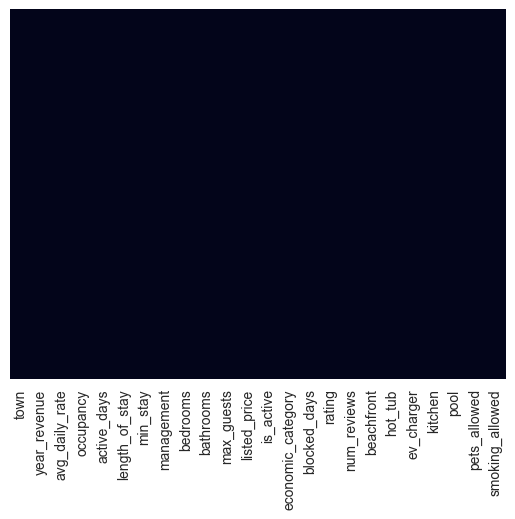

In [418]:
#checking effectiveness of removing null values in the dataset.
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

Checking missing values on the dataset using a heatmap - shows that there are no longer missing/NaN values in the dataset.

#checking for zero values for bathrooms. 0 values are also not valid

In [419]:
zero_bedroom= data[data['bathrooms'] == 0]
zero_bedroom

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
259,Chelmsford,7969,122.60,31,213,9.0,1,Individual,2,0.0,...,153,4.96,24,No,No,No,Yes,No,No,No
391,Brentwood,27524,108.36,71,359,19.0,1,Small,2,0.0,...,7,4.64,42,No,No,No,Yes,No,No,No
468,Colchester,7011,56.09,60,208,22.0,2,Small,2,0.0,...,78,5.00,4,No,No,Yes,Yes,No,No,No
1212,Clacton-on-Sea,2952,105.43,13,212,4.0,2,Individual,3,0.0,...,145,4.57,7,No,No,No,Yes,No,Yes,No


There are 4 row with 0 bathrooms

In [420]:
data = data[data['bathrooms'] != 0].copy()

### Outlier management 

#### Visualising Outliers with Boxplots

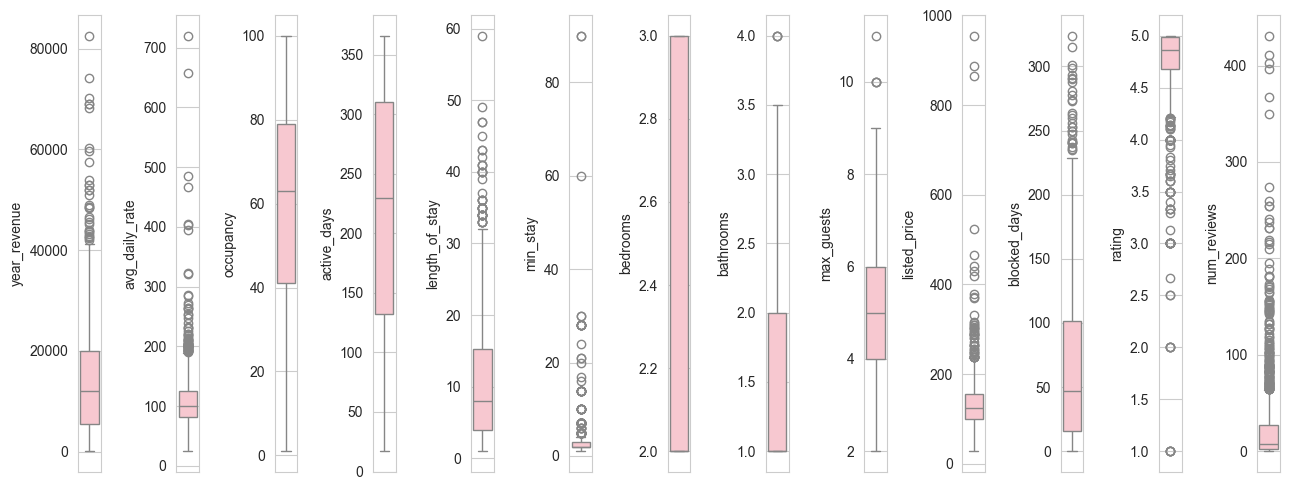

In [421]:
# Get numeric columns only, excluding 'listing_id'
numeric_cols = data.select_dtypes(include='number').columns
l = numeric_cols.values
# Set number of plots per row (columns of the figure grid)
number_of_columns = len(l)
number_of_rows=1

plt.figure(figsize=(number_of_columns, 5*number_of_rows))

for i, col in enumerate(l):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data=data[col], color='pink', orient='v')
    
    plt.tight_layout()

plt.show()

Boxplots display the median, interquartile range (IQR) and any data points that fall outside of 1.5 *IQR from the lower or uppoer quartiles(shown as cicles)

Observations:
 1. year_revenue and avg_daily rate:
 Contain several high-value outliers. this may indicate luxury or premium listings
 - these outliers could have a signifcant influence on regression models and may need transformation (eg. log scale) or capping

 2. Occupancy:
 Distribution is slightly skewed with a few listings show unusually high occu[cny rates and due to being permantently available of listed acrossed multiple platforms]

 3. active_days, length_of_stay, min_stay
 A number of long-tay outliers are present. Listings with long required stays may not be typical and could distort model predictions. 

 4. bedrooms, bathrooms , max_guest


### Revenue

In [423]:
#Using winsorization for outlier management
data['year_revenue_winsorised']= winsorize(data['year_revenue'], limits=[0.01, 0.01])  # setting caps at 1% and 99%

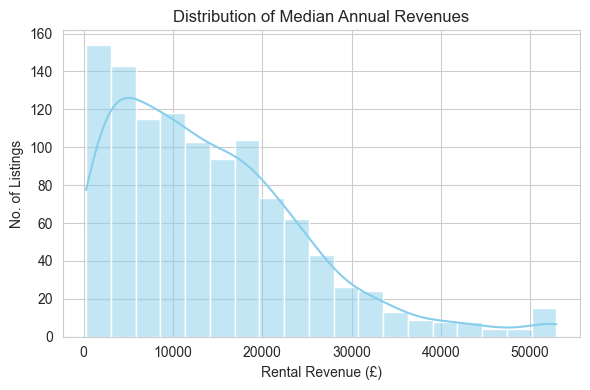

In [424]:
#Visualising distributions col = 'est_rental_revenue_median'

plt.figure(figsize=(6, 4))  

sns.histplot(x=data['year_revenue'], kde=True, color='skyblue')
plt.title('Distribution of Median Annual Revenues')
plt.xlabel('Rental Revenue (£)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

Both the boxplot and the right skew in the distribution curve above highlights that there are possible outliers in the upper value, noticeably in the range above £40000. 

In [425]:
# looking at the top 10 listings with highest revenues: 
data[data['year_revenue']>40000].sort_values(by='year_revenue', ascending=False).head(10)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,year_revenue_winsorised
623,Colchester,52944,201.33,100,350,7.0,2,Large,2,2.0,...,5.00,6,No,No,No,Yes,No,No,No,52944
622,Colchester,52944,192.79,99,313,6.0,1,Large,2,1.5,...,5.00,3,No,Yes,No,Yes,No,Yes,No,52944
621,Colchester,52944,147.57,100,366,5.0,3,Small,2,2.0,...,5.00,4,No,Yes,No,Yes,No,Yes,No,52944
620,Colchester,52944,404.15,95,138,3.0,2,Large,2,1.0,...,4.67,3,No,Yes,No,Yes,No,Yes,No,52944
1161,Colchester,52944,210.89,95,286,2.0,1,Large,3,2.0,...,5.00,4,No,No,No,Yes,No,Yes,No,52944
1162,Colchester,52944,231.36,98,304,5.0,2,Large,3,3.0,...,5.00,1,No,No,No,Yes,No,Yes,No,52944
1160,Colchester,52944,177.78,91,326,5.0,2,Individual,3,2.0,...,4.85,144,No,No,No,Yes,No,Yes,No,52944
1307,Grays,52944,322.57,70,366,2.0,1,Individual,3,1.5,...,4.86,0,No,No,No,Yes,No,No,Yes,52944
680,Saffron-Walden,52944,188.33,100,362,5.0,3,Moderate,2,1.0,...,5.00,4,No,No,No,Yes,No,Yes,No,52944
681,Saffron-Walden,52944,321.35,61,354,2.0,2,Small,2,2.5,...,5.00,11,No,Yes,Yes,Yes,No,No,No,52944


It can be observed that properties with high revenue have relatively high average daily rates and occupancies (above 70%). This may suggest  that these outliers may be genuine high performing properties.


In [426]:
#establishing the level considered "high revenue"
percentiles = data['year_revenue'].quantile([0.99, 0.95, 0.90, 0.85, 0.80, 0.75])
print(percentiles)

0.99    52761.41
0.95    34197.35
0.90    27761.10
0.85    24621.55
0.80    22010.60
0.75    19984.00
Name: year_revenue, dtype: float64


In [427]:
low_rev = data[data['year_revenue'] < 20000]
high_rev = data[data['year_revenue'] >= 20000]

print(f"{len(high_rev)} listings are at 75th percentile of revenue (threshold = £20000)")

278 listings are at 75th percentile of revenue (threshold = £20000)


In [428]:
#creating a comparison table of features from low vs high revenue

summary = pd.DataFrame({
    'Low Revenue (<20000)':low_rev.mean(numeric_only=True),
    'High Revenue (≥40%)': high_rev.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Revenue (<20000),High Revenue (≥40%)
year_revenue,9157.10,29065.88
avg_daily_rate,102.47,137.52
occupancy,52.59,76.61
active_days,191.54,303.05
length_of_stay,11.50,9.90
min_stay,3.18,2.73
bedrooms,2.33,2.41
bathrooms,1.41,1.53
max_guests,4.94,5.27
listed_price,127.69,163.66


Observations for higher revenue yielding properties:
- higher average daily rate
- higher occupancy
- higher number of active days
- lower length of stay
- higher listed price
- less blocked days
- higher number of reviews


Revenue calculation is directly related to Occupancy  and therefore we need to look at these more closely.

### Occupancy

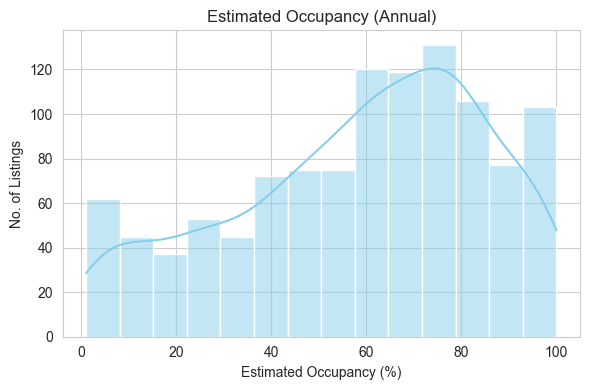

In [429]:
plt.figure(figsize=(6, 4))  

sns.histplot(x=data['occupancy'], kde=True, color='skyblue')
plt.title('Estimated Occupancy (Annual)')
plt.xlabel('Estimated Occupancy (%)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [430]:
# analysing low occupancy listings. 
low_occupancy_threshold = 40
low_occupancy = data[data['occupancy'] < low_occupancy_threshold]

print(f"{len(low_occupancy)} listings have occupancy < {low_occupancy_threshold}%")
display(low_occupancy.sort_values(by='occupancy'))

267 listings have occupancy < 40%


,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,year_revenue_winsorised
1260,Grays,267,108.68,1,164,1.0,1,Small,3,1.0,...,4.33,6,No,No,No,Yes,No,No,No,267
410,Colchester,267,66.24,1,177,1.0,4,Moderate,2,1.0,...,4.86,0,No,No,No,Yes,No,Yes,No,267
414,Colchester,269,134.64,1,264,2.0,1,Small,2,2.0,...,5.00,1,No,No,No,Yes,No,No,No,269
411,Colchester,267,80.60,1,141,2.0,1,Large,2,1.0,...,5.00,4,No,No,No,Yes,Yes,Yes,No,267
330,Brentwood,383,191.32,1,181,2.0,1,Large,2,1.0,...,4.86,0,No,No,No,Yes,No,Yes,No,383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,Southend-on-Sea,14978,118.88,39,321,5.0,1,Small,3,1.0,...,3.50,2,No,No,No,Yes,No,No,No,14978
1289,Grays,11221,102.94,39,282,25.0,3,Moderate,3,1.5,...,5.00,2,No,No,No,Yes,No,No,No,11221
959,Southend-on-Sea,13904,111.24,39,324,7.0,1,Large,3,1.0,...,4.52,52,No,No,No,Yes,No,No,No,13904
444,Colchester,4053,79.48,39,131,6.0,2,Individual,2,2.0,...,5.00,9,No,No,No,Yes,No,Yes,No,4053


In [431]:
#establishing the level considered "low occupancy"
percentiles = data['occupancy'].quantile([0.01, 0.05, 0.10, 0.15, 0.20, 0.25])
print(percentiles)

0.01     2.0
0.05     8.0
0.10    17.0
0.15    26.0
0.20    33.0
0.25    41.0
Name: occupancy, dtype: float64


At the first quantile, the occupancy rate is 40%

In [432]:
low_occ = data[data['occupancy'] < 40]
high_occ = data[data['occupancy'] >= 40]

print(f"{len(low_occ)} listings have < 40% occupancy")

267 listings have < 40% occupancy


In [434]:
#creating a comparison table of features from low vs high occupancy

summary = pd.DataFrame({
    'Low Occupancy (<40%)': low_occ.mean(numeric_only=True),
    'High Occupancy (≥40%)': high_occ.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Occupancy (<40%),High Occupancy (≥40%)
year_revenue,4922.14,16971.14
avg_daily_rate,118.78,108.79
occupancy,19.86,70.67
active_days,199.24,225.47
length_of_stay,7.96,12.08
min_stay,3.16,3.04
bedrooms,2.43,2.33
bathrooms,1.47,1.43
max_guests,5.28,4.94
listed_price,146.78,133.44


Significant difference, higher revenues:
- lower average daily rate
- higher occupancy
- higher active days (i.e listings)
- lower length of stays
- lower listed price
-significantly higher number of reviews

### **Location Analysis**

In [435]:
#checking Town values
data['town'].unique()

array(['Grays', 'Southend-on-Sea', 'Chelmsford', 'Brentwood',
       'Colchester', 'Saffron-Walden', 'Clacton-on-Sea', 'Walton-on-Naze'],
      dtype=object)

In [436]:
low_towns = low_occ['town'].value_counts(normalize=True) * 100
high_towns = high_occ['town'].value_counts(normalize=True) * 100

town_compare = pd.concat([low_towns, high_towns], axis=1, keys=['Low Occ %', 'High Occ %']).fillna(0)
town_compare['Difference'] = town_compare['Low Occ %'] - town_compare['High Occ %']
town_compare = town_compare.sort_values('Difference', ascending=False)
display(town_compare.head(10))

,Low Occ %,High Occ %,Difference
town,,,
Grays,17.228464,9.378664,7.849801
Clacton-on-Sea,17.602996,11.606096,5.996900
Southend-on-Sea,21.348315,19.929660,1.418655
Brentwood,6.367041,5.861665,0.505376
Saffron-Walden,2.996255,5.509965,-2.513710
Walton-on-Naze,3.745318,6.565064,-2.819746
Chelmsford,7.116105,11.957796,-4.841691
Colchester,23.595506,29.191090,-5.595585


In [437]:
# Revenue-based town distribution
low_rev_towns = low_rev['town'].value_counts(normalize=True) * 100
high_rev_towns = high_rev['town'].value_counts(normalize=True) * 100

town_compare_rev = pd.concat([low_rev_towns, high_rev_towns], axis=1, keys=['Low Rev %', 'High Rev %']).fillna(0)
town_compare_rev['Difference'] = town_compare_rev['Low Rev %'] - town_compare_rev['High Rev %']
town_compare_rev = town_compare_rev.sort_values('Difference', ascending=False)
display(town_compare_rev.head(10))

,Low Rev %,High Rev %,Difference
town,,,
Grays,13.064133,5.755396,7.308737
Walton-on-Naze,6.413302,4.316547,2.096755
Brentwood,6.413302,4.676259,1.737043
Clacton-on-Sea,13.420428,11.870504,1.549924
Southend-on-Sea,20.546318,19.424460,1.121858
Saffron-Walden,4.156770,7.194245,-3.037475
Colchester,26.603325,31.654676,-5.051351
Chelmsford,9.382423,15.107914,-5.725491


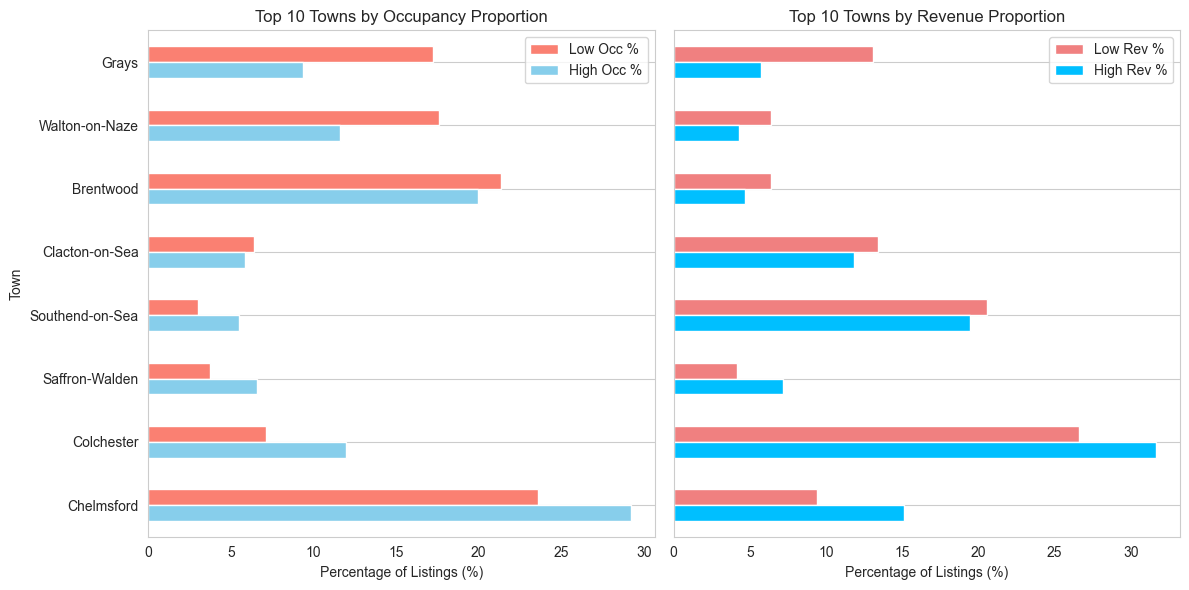

In [438]:

# Get top 10 towns by occupancy difference
top_occ_towns = town_compare.head(10)

# Get top 10 towns by revenue difference
top_rev_towns = town_compare_rev.head(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot 1: Occupancy
top_occ_towns[['Low Occ %', 'High Occ %']].plot(
    kind='barh', ax=axes[0], color=['salmon', 'skyblue'], legend=True
)
axes[0].set_title('Top 10 Towns by Occupancy Proportion')
axes[0].set_xlabel('Percentage of Listings (%)')
axes[0].set_ylabel('Town')
axes[0].invert_yaxis()
axes[0].grid(axis='x')

# Plot 2: Revenue
top_rev_towns[['Low Rev %', 'High Rev %']].plot(
    kind='barh', ax=axes[1], color=['lightcoral', 'deepskyblue'], legend=True
)
axes[1].set_title('Top 10 Towns by Revenue Proportion')
axes[1].set_xlabel('Percentage of Listings (%)')
axes[1].set_ylabel('')
axes[1].invert_yaxis()
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

### Number of Bedrooms

In [439]:
bedroom_occ = data.groupby('bedrooms')['occupancy'].agg(['mean', 'median', 'count']).sort_index()
display(bedroom_occ)

,mean,median,count
bedrooms,,,
2,60.878788,65.0,726
3,54.271574,59.0,394


C:\Users\teamc\AppData\Local\Temp\ipykernel_4328\3763952487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x='bedrooms', y='occupancy', jitter=True, alpha=0.5, palette='Set2')


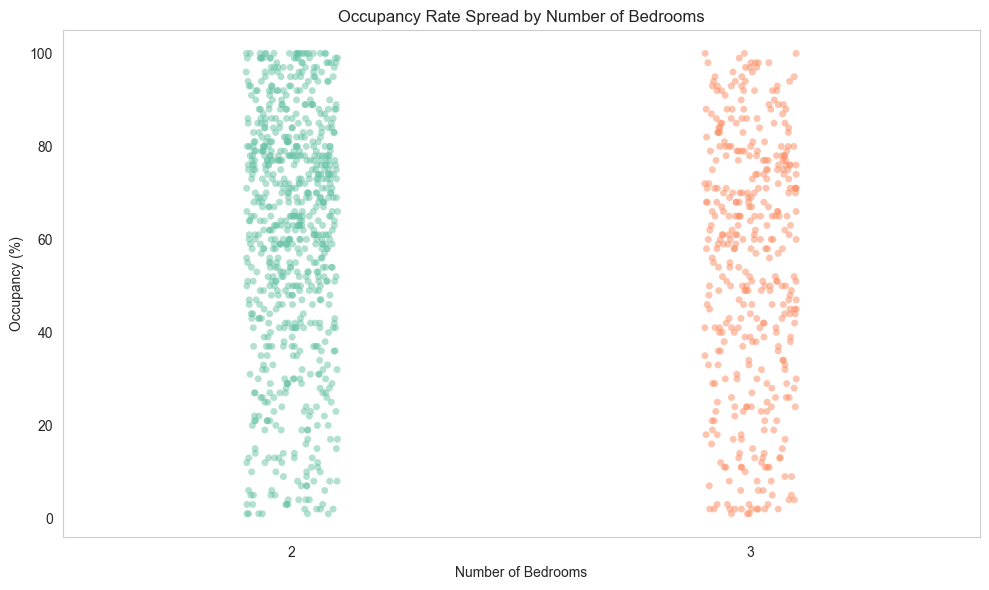

In [354]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='bedrooms', y='occupancy', jitter=True, alpha=0.5, palette='Set2')
plt.title('Occupancy Rate Spread by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Occupancy (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Data Pre-processing 

In [449]:
data_encoded = data.copy()

In [450]:
from sklearn import preprocessing

for x in data_encoded.columns:
    if data_encoded[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder() # encoding
        lbl.fit(list(data_encoded[x].values)) # fitting the model
        data_encoded[x] = lbl.transform(list(data_encoded[x].values)) # transforming into various integer codes

In [451]:
data_encoded.head(20)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,year_revenue_winsorised
21,4,567,113.31,4,136,5.0,4,2,2,1.0,...,4.86,0,0,0,0,1,0,1,0,567
22,4,597,119.41,10,49,5.0,1,1,2,2.0,...,4.42,0,0,0,0,1,0,0,0,597
23,4,627,156.73,13,30,4.0,2,2,2,2.0,...,5.00,4,0,0,0,1,0,0,0,627
24,4,689,86.08,15,54,6.0,2,1,2,1.0,...,4.86,0,0,0,0,1,0,0,0,689
25,4,725,103.58,20,35,4.0,3,3,2,1.0,...,4.86,0,0,0,0,1,0,0,0,725
26,4,767,95.82,5,154,8.0,1,1,2,1.0,...,5.00,4,0,0,0,1,0,0,0,767
27,4,831,103.88,8,104,3.0,1,0,2,2.0,...,5.00,2,0,0,0,1,0,0,0,831
28,4,894,111.79,13,64,5.0,2,0,2,1.0,...,5.00,1,0,0,0,1,0,0,0,894
29,4,1211,110.05,15,73,4.0,3,0,2,1.0,...,5.00,2,0,0,0,1,0,0,0,1211
30,4,1254,125.38,20,50,10.0,1,1,2,1.0,...,5.00,1,0,0,0,1,0,0,0,1254


<Axes: >

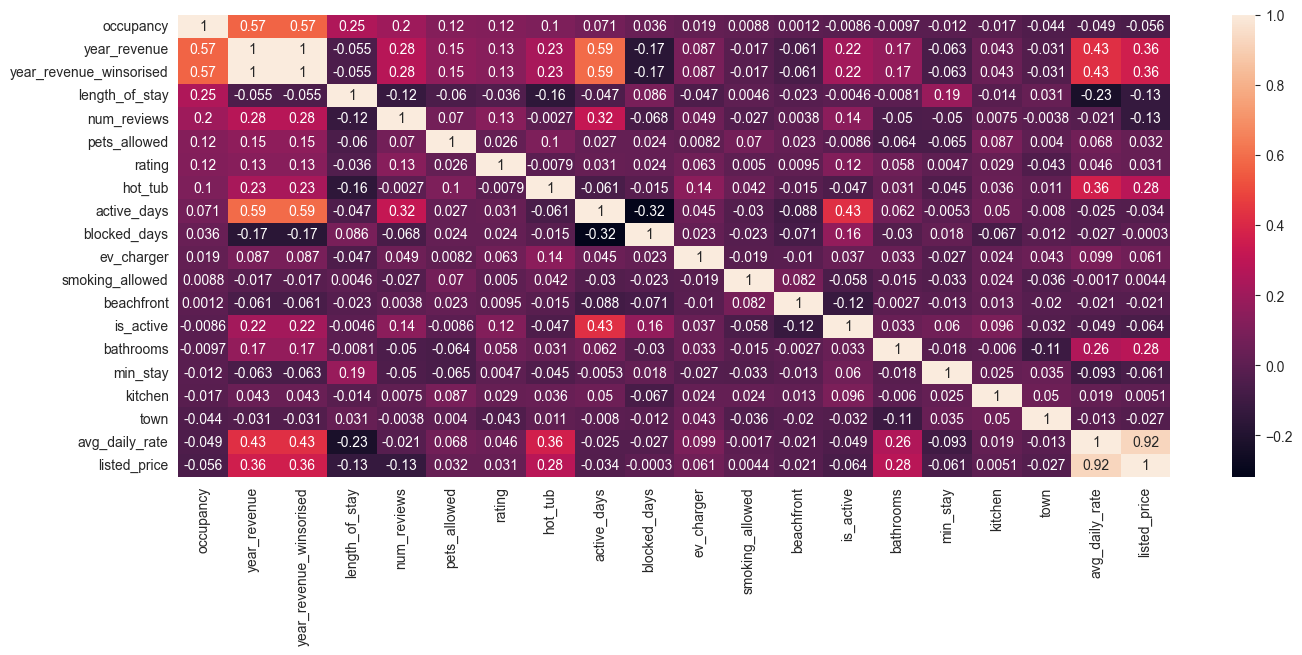

In [452]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))


#Quality correlation matrix

k =20  # number of variables for heatmap # want to just pick out the top 12 
cols = data_encoded.corr().nlargest(k, 'occupancy')['occupancy'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

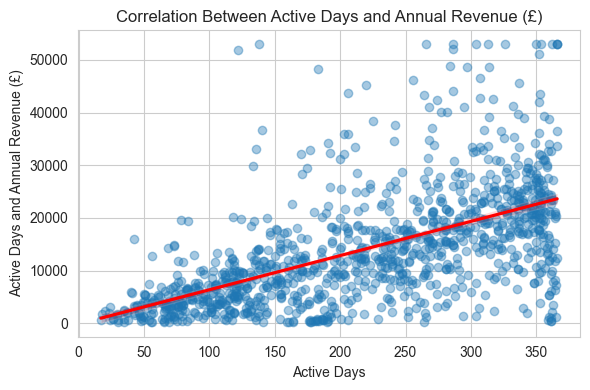

In [441]:
plt.figure(figsize=(6, 4))
sns.regplot(data=data, x='active_days', y='year_revenue_winsorised', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Correlation Between Active Days and Annual Revenue (£)')
plt.xlabel('Active Days')
plt.ylabel('Active Days and Annual Revenue (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

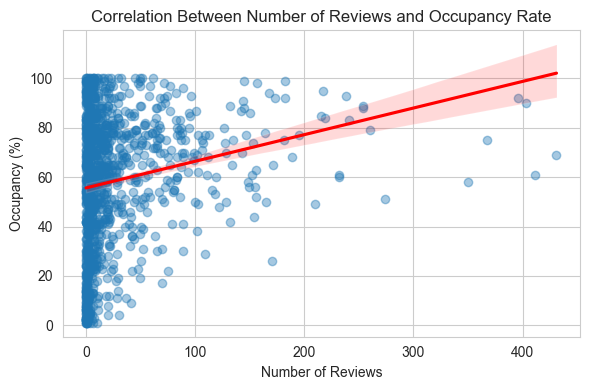

In [442]:
plt.figure(figsize=(6, 4))
sns.regplot(data=data, x='num_reviews', y='occupancy', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Correlation Between Number of Reviews and Occupancy Rate')
plt.xlabel('Number of Reviews')
plt.ylabel('Occupancy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Categorical Features


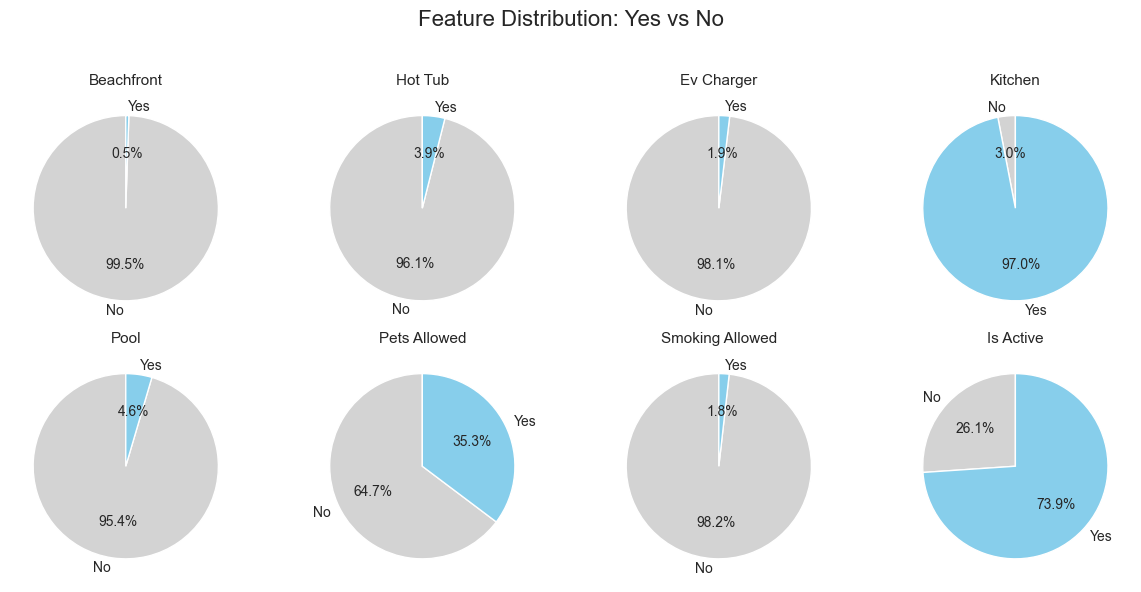

In [443]:
binary_features = {
    'beachfront': [1114, 6],
    'hot_tub': [1076, 44],
    'ev_charger': [1099, 21],
    'kitchen': [34, 1086],
    'pool': [1069, 51],
    'pets_allowed': [725, 395],
    'smoking_allowed': [1100, 20],
    'is_active': [292, 828]
}

labels = ['No', 'Yes']
colors = ['lightgrey', 'skyblue']

# Set up subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, (feature, values) in enumerate(binary_features.items()):
    ax = axes[i]
    ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(feature.replace('_', ' ').title(), fontsize=11)

# Adjust layout
plt.suptitle('Feature Distribution: Yes vs No', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<Axes: >

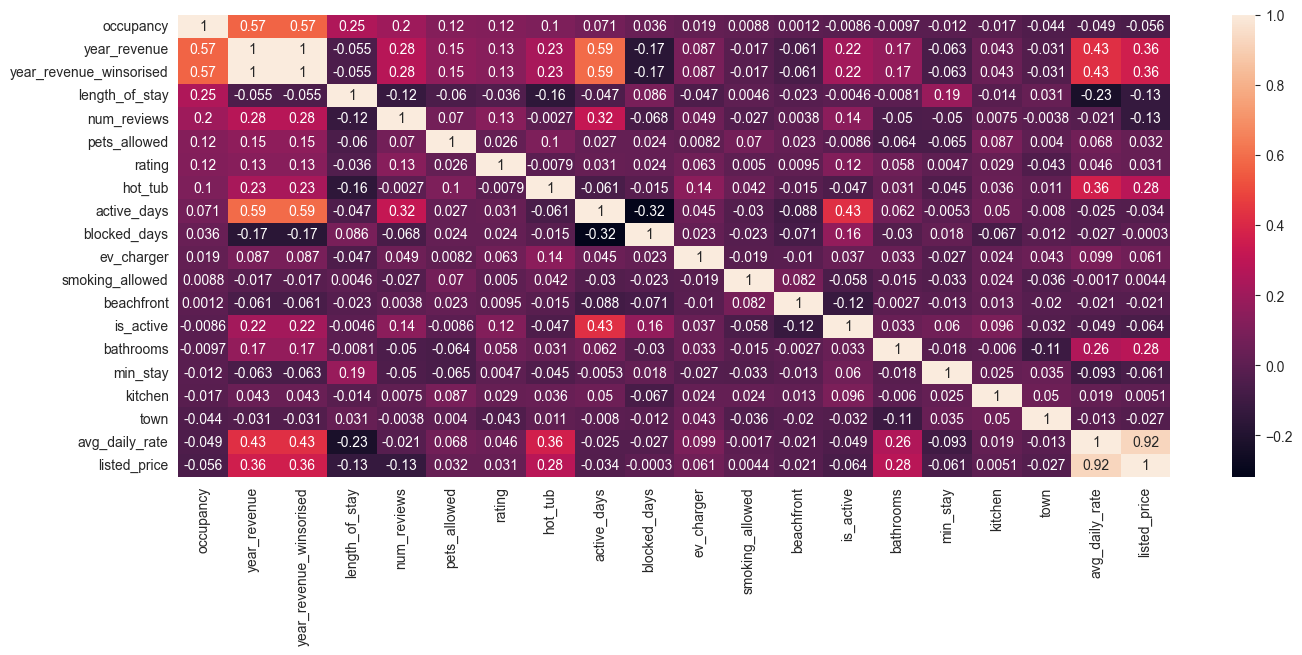